# 0. Introdução

**Trabalho**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois conjuntos de dados para trabalhar o problema de regressão. Separe cada dataset em conjunto de treinamento e conjunto de teste. Explique o seu critério de separação e o método utilizado.
- Você deverá implementar soluções para cada dataset usando:
- - regressão linear (ou regressão múltipla)
- - regressão polinomial
- - SVR (use os kernels linear, sigmoide, RBF e polinomial)
- - rede neural (MLP ou RBF).
- Descreva os parâmetros/arquiteturas de cada modelo.
- Compare os resultados (para treinamento e teste) com as medidas de desempenho SEQ, EQM, REQM, EAM e r² , e verifique qual a melhor opção dentre os métodos implementados que melhor se ajusta a seus dados.
- Você deverá fazer a visualização dos dados originais com os dados ajustados em cada experimento, tanto para o conjunto de treinamento quanto para o de teste. Os gráficos devem conter títulos nos eixos e legenda. Comente os resultados encontrados na visualização.

## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
#Utils
import pandas as pd
import numpy as np
import pandas_profiling
import math

#Preprocess
from sklearn.preprocessing import StandardScaler

# Split
from sklearn.model_selection import train_test_split

# Regressores
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#Metricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Dados

O conjunto de dados possui informações sobre pacientes que podem ter risco de doenças do coração em 10 anos.
Possui mais de 4 mil registros e 15 atributos


Fonte: https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

## 1.1 Informações sobre os dados:

#### Atributos:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)
Predict variable (desired target)
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

## Importando Dataset

In [2]:
dataset = './dataset/datasets_222487_478477_framingham.csv'

data_raw = pd.read_csv(dataset)

In [3]:
data_raw.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data_raw.education = data_raw.education.fillna(0)
data_raw.cigsPerDay = data_raw.cigsPerDay.fillna(data_raw.cigsPerDay.mean())
data_raw.BPMeds = data_raw.BPMeds.fillna(0)
data_raw.totChol = data_raw.totChol.fillna(data_raw.totChol.mean())
data_raw.BMI = data_raw.BMI.fillna(data_raw.BMI.mean())
data_raw.heartRate = data_raw.heartRate.fillna(data_raw.heartRate.mean())
data_raw.glucose = data_raw.glucose.fillna(data_raw.glucose.mean())

array([4., 2., 1., 3., 0.])

## Pré-processamento

In [11]:
# pandas_profiling.ProfileReport(data_raw)

## Visualização

In [12]:
# sns.pairplot(data_raw)

In [13]:
plt.clf()

<Figure size 432x288 with 0 Axes>

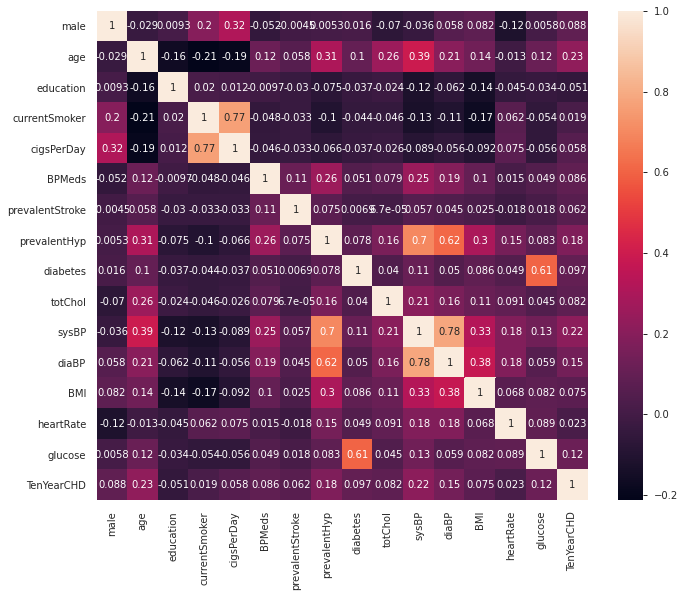

In [14]:
plt.subplots(figsize=(11, 9))
sns.heatmap(data_raw.corr(), annot=True)

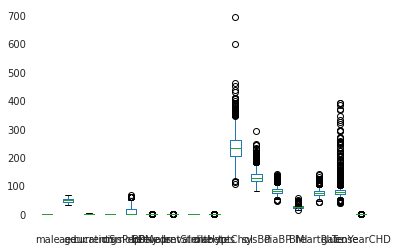

In [15]:
data_raw.plot.box()

## Escalonando

In [16]:
scaler = StandardScaler().fit(data_raw)
data_scaled = scaler.transform(data_raw)

In [17]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_raw.columns)

In [18]:
data_scaled_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153192,-1.234951,1.966086,-0.988271,-0.757974,-0.173612,-0.077033,-0.671101,-0.162477,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517,-0.423305
1,-0.867158,-0.418257,0.066560,-0.988271,-0.757974,-0.173612,-0.077033,-0.671101,-0.162477,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311,-0.423305
2,1.153192,-0.184916,-0.883204,1.011868,0.925835,-0.173612,-0.077033,-0.671101,-0.162477,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078,-0.423305
3,-0.867158,1.331800,1.016323,1.011868,1.767740,-0.173612,-0.077033,1.490089,-0.162477,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141,2.362360
4,-0.867158,-0.418257,1.016323,1.011868,1.178407,-0.173612,-0.077033,-0.671101,-0.162477,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840,-0.423305


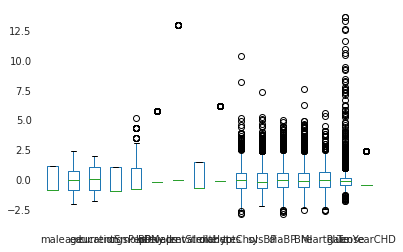

In [19]:
data_scaled_df.plot.box()

## Utilidades

In [20]:
lista_metricas_treino = []
lista_metricas_teste = []

In [21]:
def metricas(y_true, y_pred, alg):
    r2 = r2_score(y_true, y_pred)
    eqm = mean_squared_error(y_true, y_pred)
    seq = len(y_true)*eqm
    reqm = math.sqrt(eqm)

    return {'Algoritmo':alg, 'R2':r2, 'EQM':eqm, 'REQM':reqm, 'SEQ':seq}

## Separando conjuntos de Treino e Teste

Para a separação utilizou-se do train_test_split que divide o conjunto em treino e teste aleatóriamente

In [22]:
test_attr = 'male';
output_attr = 'TenYearCHD';
train, test = train_test_split(data_scaled_df, test_size = 0.2, shuffle=True)

x_train = train.drop(columns=[output_attr])
y_train = train[output_attr]

x_test = test.drop(columns=[output_attr])
y_test = test[output_attr]

## Aplicando a Regressão

### Regressão Linear

In [23]:
lire = LinearRegression()

In [24]:
lire.fit(x_train, y_train)

LinearRegression()

## Avaliação para Teste

In [25]:
y_pred = lire.predict(x_test)
linear_metricas = metricas(y_test, y_pred, 'Regressão Linear - Teste')
lista_metricas_teste.append(linear_metricas)

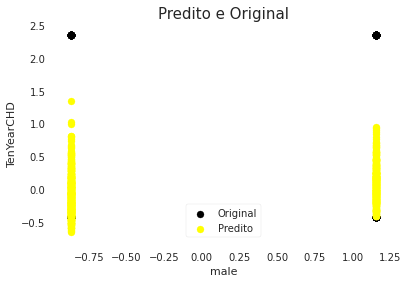

In [26]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [27]:
y_pred = lire.predict(x_train)
linear_metricas = metricas(y_train, y_pred, 'Regressão Linear - Treino')
lista_metricas_treino.append(linear_metricas)

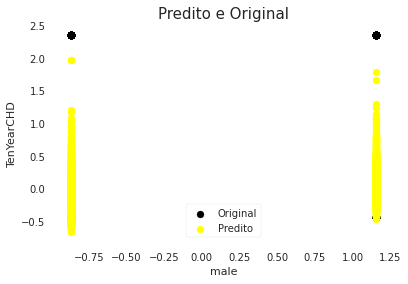

In [28]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## SVR

### Kernel RBF

In [29]:
svr_reg = SVR(kernel='rbf')

In [30]:
svr_reg.fit(x_train, y_train)

SVR()

## Avaliação para Teste

In [31]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - RBF - Teste')
lista_metricas_teste.append(svr_metricas)

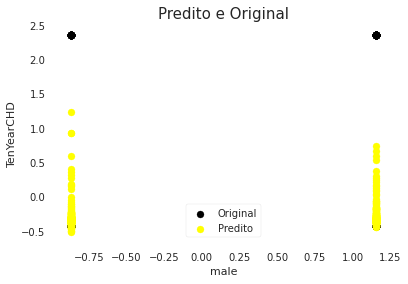

In [32]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [33]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - RBF - Treino')
lista_metricas_treino.append(svr_metricas)

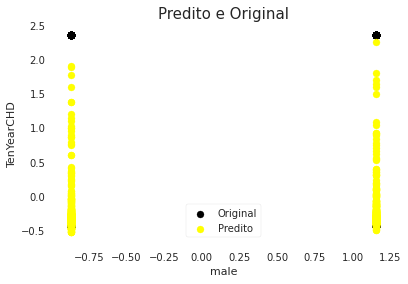

In [34]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Linear

In [35]:
svr_reg = SVR(kernel='linear')

In [36]:
svr_reg.fit(x_train, y_train)

SVR(kernel='linear')

## Avaliação para Teste

In [37]:
y_pred = svr_reg.predict(x_test)
metricas_svr = metricas(y_test, y_pred, 'SVR - Linear - Teste')
lista_metricas_teste.append(metricas_svr)

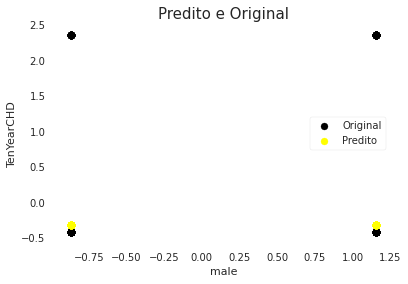

In [38]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [39]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Linear - Treino')
lista_metricas_treino.append(svr_metricas)

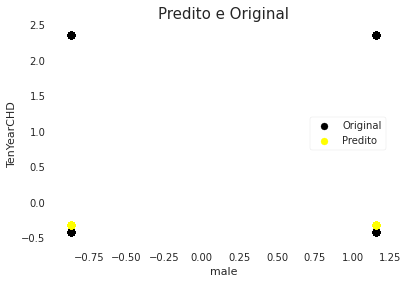

In [40]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Sigmoide

In [41]:
train, test = train_test_split(data_raw, test_size = 0.2, shuffle=True)

x_train_sig = train.drop(columns=[output_attr])
y_train_sig  = train[output_attr]

x_test_sig  = test.drop(columns=[output_attr])
y_test_sig  = test[output_attr]

In [42]:
svr_reg = SVR(kernel='sigmoid')

In [43]:
svr_reg.fit(x_train_sig , y_train_sig )

SVR(kernel='sigmoid')

## Avaliação para Teste

In [44]:
y_pred_sig  = svr_reg.predict(x_test_sig)
metricas_svr = metricas(y_test_sig , y_pred_sig , 'SVR - Sigmoide - Teste')
lista_metricas_teste.append(metricas_svr)

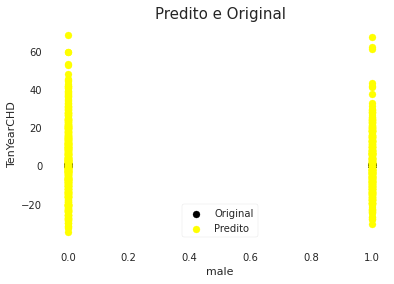

In [45]:
plt.scatter(x_test_sig [test_attr], y_test_sig ,  color='black')
plt.scatter(x_test_sig [test_attr], y_pred_sig , color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [46]:
y_pred_sig  = svr_reg.predict(x_train_sig)
svr_metricas = metricas(y_train_sig , y_pred_sig , 'SVR - Sigmoide - Treino')
lista_metricas_treino.append(svr_metricas)

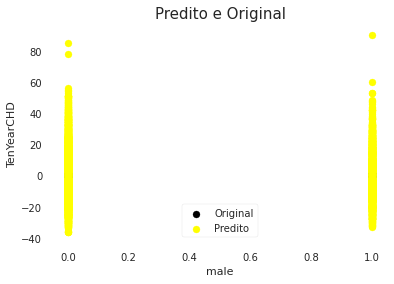

In [47]:
plt.scatter(x_train_sig [test_attr], y_train_sig ,  color='black')
plt.scatter(x_train_sig [test_attr], y_pred_sig , color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Polinomial

In [48]:
svr_reg = SVR(kernel='poly', degree=3)

In [49]:
svr_reg.fit(x_train, y_train)

SVR(kernel='poly')

## Avaliação para Teste

In [50]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - Polinomial - Teste')
lista_metricas_teste.append(svr_metricas)

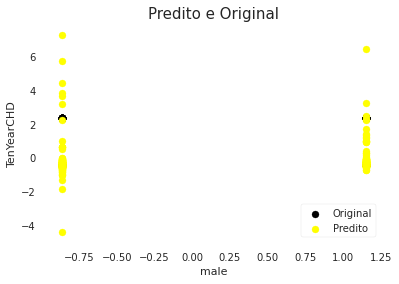

In [51]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [52]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Polinomial - Treino')
lista_metricas_treino.append(svr_metricas)

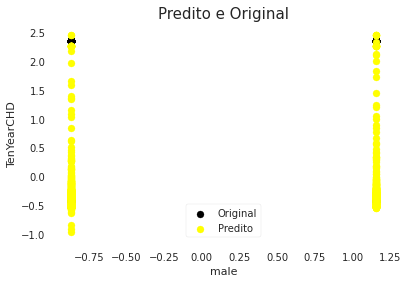

In [53]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Redes Neurais

### Kernel Linear

In [54]:
mlp_reg = MLPRegressor()

In [55]:
mlp_reg.fit(x_train, y_train)

MLPRegressor()

## Avaliação para Teste

In [56]:
y_pred = mlp_reg.predict(x_test)
mlp_metricas = metricas(y_test, y_pred, 'MLP - Teste')
lista_metricas_teste.append(mlp_metricas)

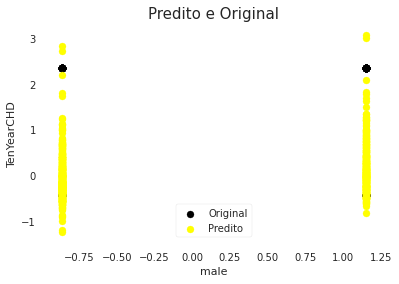

In [57]:
plt.scatter(x_test[test_attr], y_test,  color='black')
plt.scatter(x_test[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [58]:
y_pred = mlp_reg.predict(x_train)
mlp_metricas = metricas(y_train, y_pred, 'MLP - Treino')
lista_metricas_treino.append(mlp_metricas)

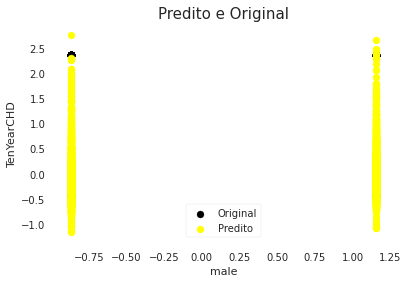

In [59]:
plt.scatter(x_train[test_attr], y_train,  color='black')
plt.scatter(x_train[test_attr], y_pred, color='yellow')
plt.xlabel(test_attr)
plt.ylabel(output_attr)
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

# Resultados

In [60]:
metricas_teste = pd.DataFrame(lista_metricas_teste)
metricas_teste

,Algoritmo,R2,EQM,REQM,SEQ
0,Regressão Linear - Teste,0.087893,0.907098,0.952417,769.219422
1,SVR - RBF - Teste,-0.049167,1.043406,1.021473,884.808664
2,SVR - Linear - Teste,-0.103276,1.097218,1.047482,930.441172
3,SVR - Sigmoide - Teste,-2198.824687,281.928404,16.790724,239075.286764
4,SVR - Polinomial - Teste,-0.275246,1.268243,1.126163,1075.470262
5,MLP - Teste,-0.012818,1.007257,1.003622,854.153811


In [61]:
metricas_teste = round(metricas_teste, 3)

In [62]:
metricas_teste

,Algoritmo,R2,EQM,REQM,SEQ
0,Regressão Linear - Teste,0.088,0.907,0.952,769.219
1,SVR - RBF - Teste,-0.049,1.043,1.021,884.809
2,SVR - Linear - Teste,-0.103,1.097,1.047,930.441
3,SVR - Sigmoide - Teste,-2198.825,281.928,16.791,239075.287
4,SVR - Polinomial - Teste,-0.275,1.268,1.126,1075.470
5,MLP - Teste,-0.013,1.007,1.004,854.154


In [63]:
metricas_teste.to_excel('framingham_metricas_teste.xlsx')

In [64]:
metricas_treino = pd.DataFrame(lista_metricas_treino)
metricas_treino

,Algoritmo,R2,EQM,REQM,SEQ
0,Regressão Linear - Treino,0.098059,0.903177,0.950356,3061.771151
1,SVR - RBF - Treino,0.028599,0.972733,0.986272,3297.563799
2,SVR - Linear - Treino,-0.104831,1.106346,1.051830,3750.512228
3,SVR - Sigmoide - Treino,-2119.951812,273.695635,16.543749,927828.201264
4,SVR - Polinomial - Treino,0.060553,0.940735,0.969915,3189.090403
5,MLP - Treino,0.341441,0.659462,0.812073,2235.577091


In [65]:
metricas_treino = round(metricas_treino, 3)

In [66]:
metricas_treino.to_excel('framingham.xlsx')